# Measures of central tendency
Measures of central tendency describe the center point of a dataset. They are useful in summarizing data, as they represent a typical value around which other data points cluster. The three most common measures are `mean`, `median`, and `mode`.

## Mean
The mean (or average) is the sum of all observations divided by the total number of observations.

#### Ungrouped Data

For ungrouped data (individual data points):

$$
Mean (\bar{x}) = \frac{\sum_{i=1}^{n} x_i}{n}
$$

Where:

- \$ x_i \$ = each value
- \$ n \$ = total number of observations

__Example:__

In [82]:
# Regular Implementation
data = [5, 10, 15, 20, 25]
mean = sum(data) / len(data)
print(f"Mean (Ungrouped Data): {mean}")

Mean (Ungrouped Data): 15.0


In [83]:
# Pandas Implementation
import pandas as pd

data_series = pd.Series(data)
mean = data_series.mean()
print(f"Mean (Ungrouped Data): {mean}")

Mean (Ungrouped Data): 15.0


#### Grouped Data
For grouped data (data is presented in a frequency table):

$$
Mean(\bar{x}) = \frac{\sum_{i=1}^{n} f_i \cdot x_i}{\sum_{i=1}^{n} f_i}
$$

Where:

- \$ f_i \$ = frequency of each class interval
- \$ x_i \$ = midpoint of each class interval
- \$ n \$ = total number of classes

__Example:__
| Class Intervals | Midpoints | Frequencies |
|-----------------|-----------|-------------|
| 0 - 10          | 5         | 4           |
| 10 - 20         | 15        | 6           |
| 20 - 30         | 25        | 8           |
| 30 - 40         | 35        | 5           |
| 40 - 50         | 45        | 7           |

In [104]:
# Regular Implementation
class_intervals = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50)]
frequencies = [4, 6, 8, 5, 7]

midpoints = [(interval[0] + interval[1]) / 2 for interval in class_intervals]
mean_grouped = sum(f * x for f, x in zip(frequencies, midpoints)) / sum(frequencies)

print(f"Mean (Grouped Data): {mean_grouped:.2f}")

Mean (Grouped Data): 26.67


In [105]:
# Pandas Implementation
df = pd.DataFrame(class_intervals, columns=['Lower', 'Upper'])
df['Frequency'] = frequencies
df['Midpoint'] = (df['Lower'] + df['Upper']) / 2
df['f * x'] = df['Frequency'] * df['Midpoint']

mean_grouped = df['f * x'].sum() / df['Frequency'].sum()

print(df.head())
print(f"Mean (Grouped Data): {mean_grouped:.2f}")

   Lower  Upper  Frequency  Midpoint  f * x
0      0     10          4       5.0   20.0
1     10     20          6      15.0   90.0
2     20     30          8      25.0  200.0
3     30     40          5      35.0  175.0
4     40     50          7      45.0  315.0
Mean (Grouped Data): 26.67


### Median
The median is the middle value when the data is arranged in ascending or descending order. It divides the dataset into two equal parts.

#### Ungrouped Data
For ungrouped data:

- **If n (number of observations) is odd**:
   
$$
\text{Median} = x_{\frac{n+1}{2}}
$$

- **If n is even**:

$$
\text{Median} = \frac{x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}}{2}
$$

Where:

- \$ x \$ represents the data points sorted in ascending order.
- \$ n \$ is the total number of observations.

__Example:__

In [106]:
# Regular Implementation
data.sort()
n = len(data)
median = data[n // 2] if n % 2 == 1 else (data[(n // 2) - 1] + data[n // 2]) / 2

print(f"Median (Ungrouped Data): {median}")

Median (Ungrouped Data): 15


In [107]:
# Pandas Implementation
median = data_series.median()
print(f"Median (Ungrouped Data): {median}")

Median (Ungrouped Data): 15.0


#### Grouped Data
For grouped data:

$$
\text{Median} = L + \left( \frac{\frac{N}{2} - CF}{f} \right) \cdot h
$$

Where:

- \$ L \$ = lower boundary of the median class
- \$ N \$ = total frequency
- \$ CF \$ = cumulative frequency of the class before the median class
- \$ f \$ = frequency of the median class
- \$ h \$ = class width

__Example:__

| Class Intervals | Frequencies | Cumulative Frequencies |
|-----------------|-------------|------------------------|
| 0 - 10          | 4           | 4                      |
| 10 - 20         | 6           | 10                     |
| 20 - 30         | 8           | 18                     |
| 30 - 40         | 5           | 23                     |
| 40 - 50         | 7           | 30                     |
| **Total**       | **30**      |                        |


In [7]:
# Regular Implementation
N = sum(frequencies)
cumulative_freq = 0
median_class = None
L, f, CF = 0, 0, 0

for i, interval in enumerate(class_intervals):
    cumulative_freq += frequencies[i]
    if cumulative_freq >= N / 2:
        median_class = interval
        L = interval[0]
        f = frequencies[i]
        CF = cumulative_freq - frequencies[i]
        break

h = median_class[1] - median_class[0]
median = L + ((N / 2 - CF) / f) * h
print(f"Median (Grouped Data): {median}")

Median (Grouped Data): 26.25


In [8]:
# Pandas Implementation
# Calculate cumulative frequency
df['Cumulative Frequency'] = df['Frequency'].cumsum()

# Total frequency
N = df['Frequency'].sum()

# Find median class
median_class_index = df[df['Cumulative Frequency'] >= N / 2].index[0]
median_class = df.iloc[median_class_index]

# Extract values for median calculation
L = median_class['Lower']            # Lower boundary
f = median_class['Frequency']        # Frequency of median class
CF = df.iloc[median_class_index - 1]['Cumulative Frequency'] if median_class_index > 0 else 0  # Cumulative frequency of the class before
h = median_class['Upper'] - median_class['Lower']  # Class width

# Calculate median
median = L + ((N / 2 - CF) / f) * h
print(f"Median (Grouped Data): {median}")

Median (Grouped Data): 26.25


### Mode
The mode is the most frequently occurring value in a dataset.

#### Ungrouped Data
For ungrouped data:
- Mode is the value that appears most often in the dataset.

__Example:__

In [9]:
# Regular Implementation
from collections import Counter

mode = Counter(data).most_common(1)[0][0]
print(f"Mode (Ungrouped Data): {mode}")

Mode (Ungrouped Data): 5


- `Counter(data):` - count the occurrences of each unique element in the list.
- `.most_common(1)` - returns a list containing one tuple: the most common element and its count(first element is the item, second element is it's count)

In [10]:
# Pandas Implementation
mode = data_series.mode()[0]
print(f"Mode (Ungrouped Data): {mode}")

Mode (Ungrouped Data): 5


#### Grouped Data
For grouped data:

$$
\text{Mode} = L + \left( \frac{2f_1 - f_0 - f_2}{f_1 - f_0} \right) \cdot h 
$$

Where:
- \$ L \$ = lower boundary of the modal class
- \$ f_1 \$ = frequency of the modal class
- \$ f_0 \$ = frequency of the class preceding the modal class
- \$ f_2 \$ = frequency of the class succeeding the modal class
- \$ h \$ = class width

__Example:__

In [11]:
# Regular Implementation
# Find the modal class
modal_class_index = frequencies.index(max(frequencies))
L = class_intervals[modal_class_index][0]
f1 = frequencies[modal_class_index]
f0 = frequencies[modal_class_index - 1] if modal_class_index > 0 else 0
f2 = frequencies[modal_class_index + 1] if modal_class_index < len(frequencies) - 1 else 0
h = class_intervals[modal_class_index][1] - class_intervals[modal_class_index][0]

mode = L + ((f1 - f0) / (2 * f1 - f0 - f2)) * h
print(f"Mode (Grouped Data): {mode}")

Mode (Grouped Data): 24.0


In [12]:
# Pandas Implementation
# Find the modal class
modal_class_index = df['Frequency'].idxmax()  # Index of the maximum frequency
L = df['Lower'][modal_class_index]  # Lower boundary of the modal class
f1 = df['Frequency'][modal_class_index]  # Frequency of the modal class
f0 = df['Frequency'][modal_class_index - 1] if modal_class_index > 0 else 0  # Frequency of the class before modal class
f2 = df['Frequency'][modal_class_index + 1] if modal_class_index < len(frequencies) - 1 else 0  # Frequency of the class after modal class
h = df['Upper'][modal_class_index] - df['Lower'][modal_class_index]  # Class width

mode = L + ((f1 - f0) / (2 * f1 - f0 - f2)) * h

print(f"Mode (Grouped Data): {mode}")

Mode (Grouped Data): 24.0


## Summary of When to Use Mean, Median, and Mode

| **Measure** | **Best for** | **Not Suitable for** | **Typical Applications** |
|-------------|---------------|----------------------|--------------------------|
| **Mean**    | Continuous data, normal distribution, when all values are important | Skewed data, data with outliers | Average income, temperatures, grades |
| **Median**  | Skewed data, ordinal data, data with outliers | Data with many small variations | Household income, property prices, satisfaction surveys |
| **Mode**    | Categorical data, nominal data, identifying the most common category | Continuous data, data without frequent repetitions | Most common product, survey responses, demographics |

## Visualization

### Histogram

In [114]:
import numpy as np
import matplotlib.pyplot as plt

mean = np.mean(data)
median = np.median(data)
mode = Counter(data).most_common(1)[0][0]

#### Mean

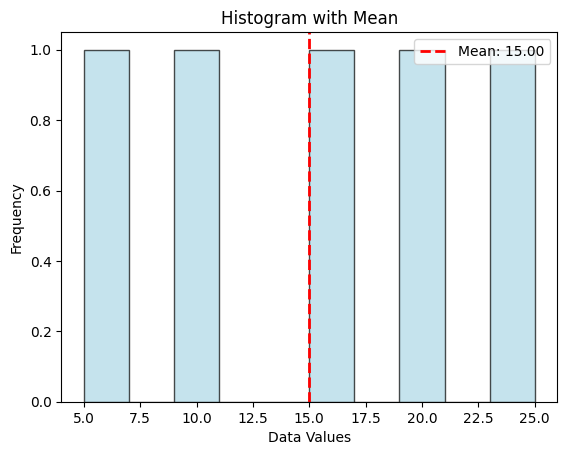

In [115]:
plt.hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.title('Histogram with Mean')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

#### Median and Mode

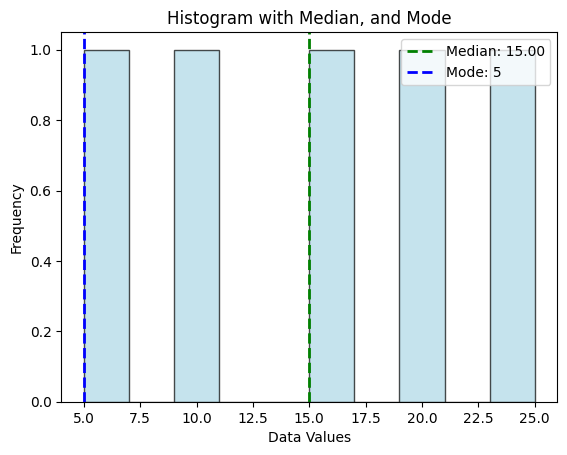

In [116]:
plt.hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mode, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode}')

plt.title('Histogram with Median, and Mode')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

### Box-Plot

#### Mean

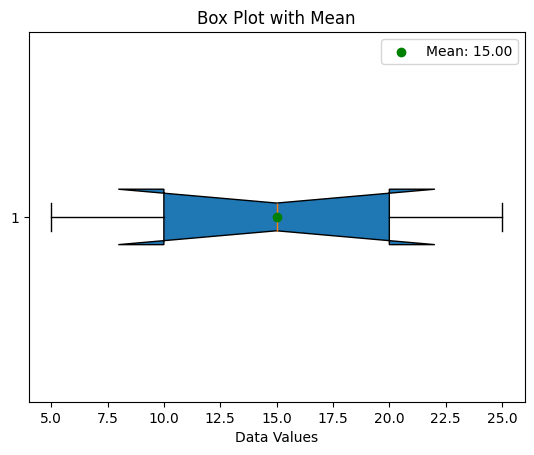

In [117]:
plt.boxplot(data, vert=False, patch_artist=True, notch=True)

plt.scatter(mean, 1, color='green', label=f'Mean: {mean:.2f}', zorder=3)

plt.title('Box Plot with Mean')
plt.xlabel('Data Values')
plt.legend(loc='upper right')
plt.show()

#### Median

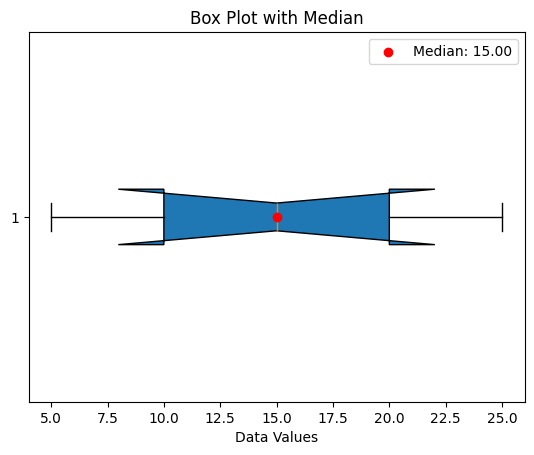

In [118]:
plt.boxplot(data, vert=False, patch_artist=True, notch=True)

plt.scatter(median, 1, color='red', label=f'Median: {median:.2f}', zorder=3)

plt.title('Box Plot with Median')
plt.xlabel('Data Values')
plt.legend(loc='upper right')
plt.show()

### Grouped Data

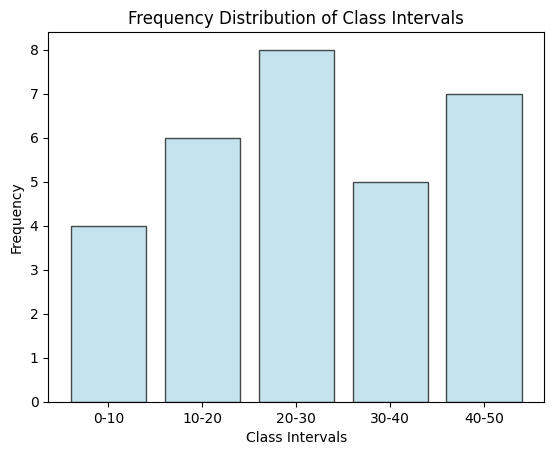

In [120]:
plt.bar(midpoints, frequencies, width=8, color='lightblue', edgecolor='black', alpha=0.7)

plt.xlabel('Class Intervals')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Class Intervals')

# Setting x-ticks to show the intervals as labels
plt.xticks(midpoints, [f"{interval[0]}-{interval[1]}" for interval in class_intervals])
plt.show()

# Quartile
A quartile is a statistical term used to divide data into four equal parts. Each quartile contains 25% of the dataset, and there are three quartile points: `Q1`, `Q2`, `Q3`

#### Ungrouped Data
__The data should be ordered in ascending order.__

#### First Quartile (Q1):
$$
Q_1 = \left(\frac{N + 1}{4}\right)^{\text{th}} \, \text{value}
$$

#### Second Quartile (Q2) (the median):
$$
Q_2 = \left(\frac{N + 1}{2}\right)^{\text{th}} \, \text{value}
$$

#### Third Quartile (Q3):
$$
Q_3 = \left(\frac{3(N + 1)}{4}\right)^{\text{th}} \, \text{value}
$$

__Example:__

In [136]:
# Regular Implementation
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)

print("Q1 (First Quartile):", q1)
print("Q2 (Median or Second Quartile):", q2)
print("Q3 (Third Quartile):", q3)

Q1 (First Quartile): 10.0
Q2 (Median or Second Quartile): 15.0
Q3 (Third Quartile): 20.0


In [137]:
# Pandas Implementation
q1 = data_series.quantile(0.25)
q2 = data_series.quantile(0.50)
q3 = data_series.quantile(0.75)

print("Q1 (First Quartile):", q1)
print("Q2 (Median or Second Quartile):", q2)
print("Q3 (Third Quartile):", q3)

Q1 (First Quartile): 10.0
Q2 (Median or Second Quartile): 15.0
Q3 (Third Quartile): 20.0


#### Grouped Data
The class interval that contains the quartile value is the quartile class. To find it, you must first compute the cumulative frequencies.
##### First Quartile (Q1):
$$
Q_1 = L + \left(\frac{\frac{N}{4} - F}{f}\right) \times h
$$

##### Second Quartile (Q2):
$$
Q_2 = L + \left(\frac{\frac{N}{2} - F}{f}\right) \times h
$$

##### Third Quartile (Q3):
$$
Q_3 = L + \left(\frac{\frac{3N}{4} - F}{f}\right) \times h
$$

Where:

- \$ L \$ = Lower boundary of the quartile class
- \$ N \$ = Total frequency
- \$ F \$ = Cumulative frequency of the class preceding the quartile class
- \$ f \$ = Frequency of the quartile class
- \$ h \$ = Width of the quartile class


In [138]:
# Regular Implementation
def calculate_quartile(quartile_position):
    quartile_class = df[df['Cumulative Frequency'] >= quartile_position].iloc[0]
    L = quartile_class['Lower']
    F = df[df['Cumulative Frequency'] < quartile_position]['Cumulative Frequency'].max() or 0
    f = quartile_class['Frequency']
    h = quartile_class['Upper'] - quartile_class['Lower']
    Q = L + ((quartile_position - F) / f) * h
    return Q

Q1_position = N / 4
Q2_position = N / 2
Q3_position = 3 * N / 4

Q1 = calculate_quartile(Q1_position)
Q2 = calculate_quartile(Q2_position)
Q3 = calculate_quartile(Q3_position)

print("Q1 (First Quartile):", Q1)
print("Q2 (Second Quartile/Median):", Q2)
print("Q3 (Third Quartile):", Q3)

Q1 (First Quartile): 15.833333333333334
Q2 (Second Quartile/Median): 26.25
Q3 (Third Quartile): 39.0


In [69]:
# Pandas Implementation
expanded_data = []
for index, row in df.iterrows():
    # Replicate each midpoint based on the frequency of the interval
    expanded_data.extend([row['Midpoint']] * int(row['Frequency']))

# Create a pandas Series from the expanded data
expanded_series = pd.Series(expanded_data)

# Compute the quartiles using pandas' quantile method
Q1_pandas = expanded_series.quantile(0.25)
Q2_pandas = expanded_series.quantile(0.5)
Q3_pandas = expanded_series.quantile(0.75)

print("Q1 (First Quartile):", Q1_pandas)
print("Q2 (Second Quartile/Median):", Q2_pandas)
print("Q3 (Third Quartile):", Q3_pandas)

Q1 (First Quartile): 15.0
Q2 (Second Quartile/Median): 25.0
Q3 (Third Quartile): 35.0


__Difference in Results__

The differences arise because the manual implementation calculates the quartiles based on the cumulative frequency and interpolates within the class intervals. The pandas implementation uses the midpoints and assumes a uniform distribution within each interval, resulting in a slightly different outcome.

## Visualization

### Frequency Distribution as a Histogram

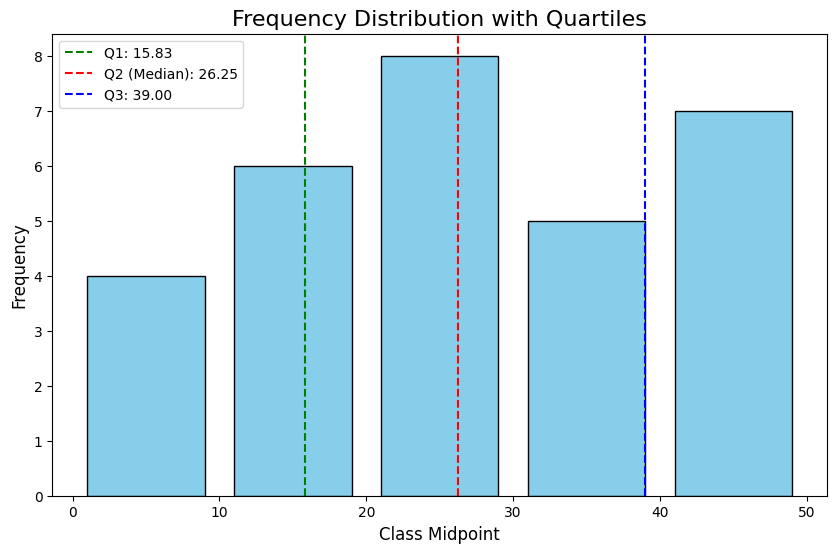

In [139]:
plt.figure(figsize=(10, 6))
plt.bar(df['Midpoint'], df['Frequency'], width=8, edgecolor='black', color='skyblue')

# Add vertical lines for Q1, Q2 (Median), and Q3
plt.axvline(Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axvline(Q2, color='red', linestyle='--', label=f'Q2 (Median): {Q2:.2f}')
plt.axvline(Q3, color='blue', linestyle='--', label=f'Q3: {Q3:.2f}')

plt.title('Frequency Distribution with Quartiles', fontsize=16)
plt.xlabel('Class Midpoint', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

### Box Plot

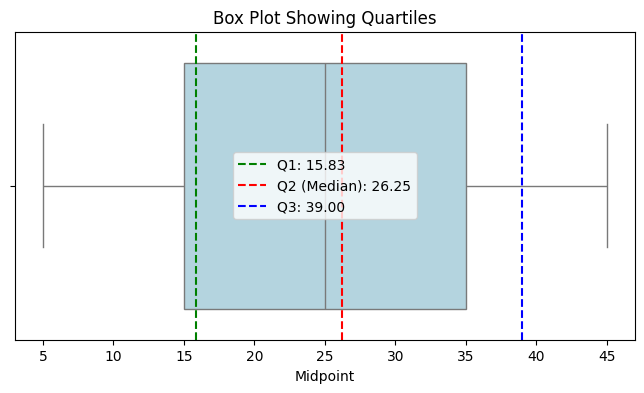

In [140]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Midpoint'].repeat(df['Frequency']), color='lightblue')
plt.axvline(Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axvline(Q2, color='red', linestyle='--', label=f'Q2 (Median): {Q2:.2f}')
plt.axvline(Q3, color='blue', linestyle='--', label=f'Q3: {Q3:.2f}')
plt.title('Box Plot Showing Quartiles')
plt.legend()
plt.show()

# Percentile
Percentile is a measure that indicates the value below which a given percentage of observations in a group of data falls. It is commonly used to understand the relative standing of a value within a dataset.

If a data point is at the 75th percentile, it means that 75% of the data points are below this value, and 25% are above it.

Percentiles divide a dataset into __100 equal parts__, so there are __99 percentiles__ in total. 

__Percentile vs. Percentage:__ Percentile refers to a ranking relative to other data points in a dataset. Percentage represents a proportion out of 100.

For example, if a student scores 70%, it means they answered 70% of the questions correctly. If they are in the 70th percentile, it means they scored better than 70% of the other students.

Percentiles are widely used in statistics to understand how data points compare to each other within a dataset. They are useful for assessing the relative standing of a particular observation, especially when analyzing test scores, income distributions, and other types of data.

__For example:__
- The 25th percentile (also known as the first quartile, 𝑄<sub>1</sub>) is the value below which 25% of the data lies.
- The 50th percentile (also known as the median, 𝑄<sub>2</sub>) is the value below which 50% of the data lies.
- The 75th percentile (also known as the third quartile, 𝑄<sub>3</sub>) is the value below which 75% of the data lies.
- The 33th percentile is the value below which 33% of the data lies.

####  Ungrouped Data

__Sort the data in ascending order.__

To calculate the P<sup>th</sup> percentile (where P is any given percentage between 0 and 100), use the formula:
$$
P^{\text{th percentile}} = \left( \frac{P}{100} \times (N+1) \right)^{\text{th value}}
$$

where N is the number of values in the dataset.

In [41]:
# Regular Implementation
data=[15, 18, 16, 20, 22, 21, 17, 19, 18, 16]
percentile_50 = np.percentile(data, 50)
print(f"50th percentile (median) is: {percentile_50}")

50th percentile (median) is: 18.0


In [42]:
# Pandas Implementation
percentile_50 = data_series.quantile(0.50)
print(f"50th percentile (median) is: {percentile_50}")

50th percentile (median) is: 15.0


#### Grouped Data

The formula for the \$ P_k \$ (k-th percentile) is:

$$
P_k = L + \left( \frac{f}{100} \times N - CF \right) \times w
$$

Where:

- \$ P_k \$ = k-th percentile
- \$ L \$ = Lower class boundary of the interval containing the k-th percentile
- \$ CF \$ = Cumulative frequency of the class before the interval containing the k-th percentile
- \$ f \$ = Frequency of the interval containing the k-th percentile
- \$ w \$ = Width of the class interval


In [48]:
# Regular Implementation
k = 70
position = (k / 100) * N

# Manual calculation to find the interval containing the 70th percentile
L = 0  # Lower boundary of the interval
CF = 0  # Cumulative frequency of the class before the interval
f = 0  # Frequency of the interval
w = 0  # Width of the interval

# Iterate over the DataFrame rows manually
for index, row in df.iterrows():
    if row['Cumulative Frequency'] >= position:
        L = row['Lower']
        CF = df.iloc[index - 1]['Cumulative Frequency'] if index > 0 else 0
        f = row['Frequency']
        w = row['Upper'] - row['Lower']
        break

# Calculate the 70th percentile using the formula
P_70 = L + ((position - CF) / f) * w
print(f"The 70th percentile is: {P_70}")

The 70th percentile is: 36.0


In [47]:
# Pandas Implementation
k = 70
position = (k / 100) * N

# Find the interval containing the 70th percentile
interval_row = df[df['Cumulative Frequency'] >= position].iloc[0]

# Extract required values
L = interval_row['Lower']  # Lower boundary of the interval
CF = df[df['Cumulative Frequency'] < position]['Cumulative Frequency'].max() or 0
f = interval_row['Frequency']  # Frequency of the interval
w = interval_row['Upper'] - interval_row['Lower']  # Width of the interval

# Calculate the 70th percentile
P_70 = L + ((position - CF) / f) * w
print(f"The 70th percentile is: {P_70}")

The 70th percentile is: 36.0


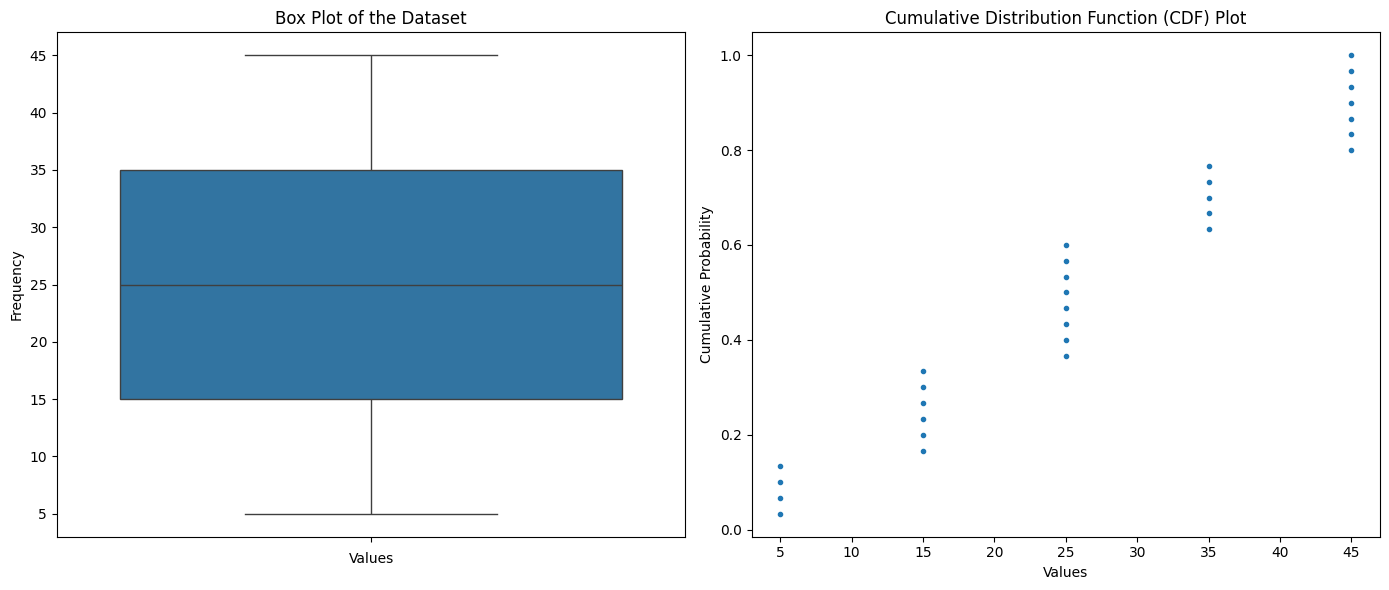

In [71]:
## Visualization
data_array = np.array(expanded_data)

plt.figure(figsize=(14, 6))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(data=data_array)
plt.title('Box Plot of the Dataset')
plt.xlabel('Values')
plt.ylabel('Frequency')
# CDF Plot
plt.subplot(1, 2, 2)
sorted_data = np.sort(data_array)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF) Plot')
plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.tight_layout()
plt.show()

# Decile
A decile is a statistical measure used to divide a dataset into 10 equal parts.

Each part represents 10% of the data, and the values that separate these parts are called the decile values. The deciles help in understanding the distribution of the data. They are particularly useful for comparing different datasets or understanding the relative standing of a particular value in the data.

The deciles divide the data into the following segments:

- 1st decile (D1) separates the lowest 10% of the data.
- 2nd decile (D2) separates the lowest 20% of the data, and so on.
- ...
- 9th decile (D9) separates the lowest 90% of the data.

#### Ungrouped Data
Mathematically, for a dataset arranged in __ascending order__, deciles can be calculated using the formula for the \$ k \$-th decile:

$$
D_k = \left( \frac{k}{10} \right) \times (N + 1)
$$

Where:

- \$ D_k \$ is the \$ k \$-th decile,
- \$ N \$ is the number of observations in the data,
- \$ k \$ is the decile number (from 1 to 9).

In [73]:
# Regular Implementation
def ungrouped_deciles(data):
    sorted_data = np.sort(data)
    deciles = [np.percentile(sorted_data, i*10) for i in range(1, 10)]
    return deciles
deciles = ungrouped_deciles(data)
for i, decile in enumerate(deciles, start=1):
    print(f"D{i} (Decile {i}): {decile}")

D1 (Decile 1): 15.9
D2 (Decile 2): 16.0
D3 (Decile 3): 16.7
D4 (Decile 4): 17.6
D5 (Decile 5): 18.0
D6 (Decile 6): 18.4
D7 (Decile 7): 19.3
D8 (Decile 8): 20.2
D9 (Decile 9): 21.1


In [74]:
# Pandas Implementation
def ungrouped_deciles(data_series):
    sorted_data = data_series.sort_values().reset_index(drop=True)
    deciles = [sorted_data.quantile(i*0.1) for i in range(1, 10)]
    return deciles

deciles = ungrouped_deciles(data_series)
for i, decile in enumerate(deciles, start=1):
    print(f"D{i} (Decile {i}): {decile}")


D1 (Decile 1): 7.0
D2 (Decile 2): 9.0
D3 (Decile 3): 11.0
D4 (Decile 4): 13.0
D5 (Decile 5): 15.0
D6 (Decile 6): 17.0
D7 (Decile 7): 19.0
D8 (Decile 8): 21.0
D9 (Decile 9): 23.0


#### Grouped Data
The deciles for grouped data are calculated using cumulative frequencies and interpolating within the intervals. To find the \( k \)-th decile, the following formula is used:

$$
D_k = L + \left( \frac{k \cdot N}{10} - C_f \right) \times \frac{h}{f}
$$

Where:

- \$ D_k \$ is the \$ k \$-th decile,
- \$ L \$ is the lower boundary of the class containing the decile,
- \$ N \$ is the total number of observations,
- \$ C_f \$ is the cumulative frequency of the class before the decile class,
- \$ f \$ is the frequency of the decile class,
- \$ h \$ is the class width.


In [82]:
# Regular Implementation
# Calculate cumulative frequency and class width
df['Class Width'] = df['Upper'] - df['Lower']

# Function to calculate deciles for grouped data
def grouped_deciles(df):
    N = df['Frequency'].sum()  # Total number of observations
    cumulative_frequency = df['Cumulative Frequency']
    
    deciles = []
    for k in range(1, 10):  # Looping through the 9 deciles (D1 to D9)
        Dk_position = k * N / 10  # Position for each decile
        for i in range(len(df)):
            if Dk_position <= cumulative_frequency[i]:  # Find the class that contains the decile
                L = df['Lower'][i]  # Lower boundary of the decile class
                f = df['Frequency'][i]  # Frequency of the decile class
                C_f = cumulative_frequency[i-1] if i > 0 else 0  # Cumulative frequency before the class
                h = df['Class Width'][i]  # Width of the class
                Dk = L + ((Dk_position - C_f) * h / f)  # Calculate the decile using the formula
                deciles.append(Dk)
                break
    return deciles

deciles_grouped = grouped_deciles(df)
for i, decile in enumerate(deciles_grouped, start=1):
    print(f"D{i} (Decile {i}): {decile}")

D1 (Decile 1): 7.5
D2 (Decile 2): 13.333333333333334
D3 (Decile 3): 18.333333333333336
D4 (Decile 4): 22.5
D5 (Decile 5): 26.25
D6 (Decile 6): 30.0
D7 (Decile 7): 36.0
D8 (Decile 8): 41.42857142857143
D9 (Decile 9): 45.714285714285715


In [83]:
# Pandas Implementation
# Repeat the midpoints based on the frequencies (to simulate raw data)
expanded_data = np.repeat(df['Midpoint'], df['Frequency'])

# Convert to a pandas Series
expanded_series = pd.Series(expanded_data)

# Use Pandas quantile to calculate deciles
deciles = expanded_series.quantile([i/10 for i in range(1, 10)])

# Display the calculated deciles
for i, decile in enumerate(deciles, start=1):
    print(f"D{i} (Decile {i}): {decile}")

D1 (Decile 1): 5.0
D2 (Decile 2): 15.0
D3 (Decile 3): 15.0
D4 (Decile 4): 25.0
D5 (Decile 5): 25.0
D6 (Decile 6): 28.999999999999986
D7 (Decile 7): 35.0
D8 (Decile 8): 45.0
D9 (Decile 9): 45.0


## Visualization

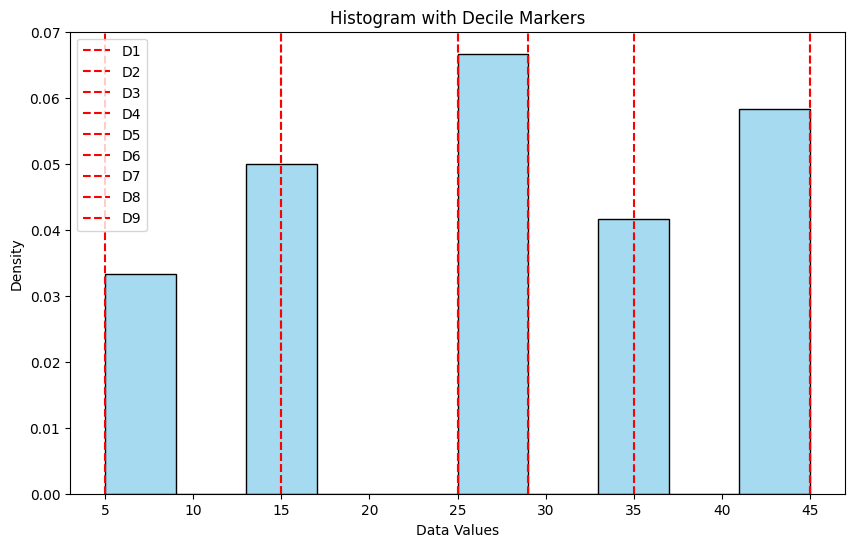

In [85]:
# Visualizing with Histogram and Decile Markers
plt.figure(figsize=(10,6))
sns.histplot(expanded_series, bins=10, kde=False, color='skyblue', stat='density')

# Mark the deciles on the histogram
for decile in deciles:
    plt.axvline(x=decile, color='red', linestyle='--', label=f'Decile at {decile:.2f}')
    
plt.title('Histogram with Decile Markers')
plt.xlabel('Data Values')
plt.ylabel('Density')

plt.legend([f"D{i+1}" for i in range(9)])
plt.show()